<a href="https://colab.research.google.com/github/mahir1995/dog-breed-prediction/blob/master/Dog_breed_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog Breed Prediction using Deep Learning

Run the below line first if you are trying to run this on google colab

In [0]:
!curl https://course-v3.fast.ai/setup/colab | bash

In [0]:
from fastai import *
from fastai.vision import *

import os

I am going to perform a dog breed prediction using fast.ai. The dataset being used is [Stanford Dog dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/). It contains 120 breeds of dog and 20580 images. Using this dataset we can predict the breed of a dog

In the below line we are going to download the dataset and untar the downloaded file

In [0]:
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'

dest = Path(url2path(url,True))
fname = 'data/images.tar'

if not dest.exists():
    
    print(f'Downloading {url}')
    download_url(url, fname)    

dest2 = Path('data/Images')
if not dest2.exists():
    tarfile.open(fname,'r:').extractall(dest.parent)


In [6]:
path = Path('data/Images')
path.ls()[:5]

[PosixPath('data/Images/n02091244-Ibizan_hound'),
 PosixPath('data/Images/n02109047-Great_Dane'),
 PosixPath('data/Images/n02098286-West_Highland_white_terrier'),
 PosixPath('data/Images/n02106662-German_shepherd'),
 PosixPath('data/Images/n02088364-beagle')]

By looking at the dataset we can see they are organized by folders. Each folder consists of images of a particular breed.So there are total of 120 folders. We need to extract only the dog breed name from the folder name. By observing the filename we get that the first 10 characters are useless for us. So we remove it from the file name and rename it.

In [0]:
for filename in os.listdir(path):
    newfilename = filename[10:]
    os.rename(path/filename, path/newfilename)

Everything we model in fastai will be of type DataBunch. It basically contains 2 or 3 dataset which are train, validation and test dataset. We can use ImageDataBunch.from_folder() because our datset is organized as folders. This function is giving errors for me so I'm using the below code to get DataBunch from folders.

In [0]:
#data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(),size=224)

tfms = get_transforms()
data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())

In [9]:
print(data.classes)
len(data.classes)

['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog', 'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Mexican_hairless', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pekinese', 'Pembroke', 'Po

120

Here are some sample from ourdataset

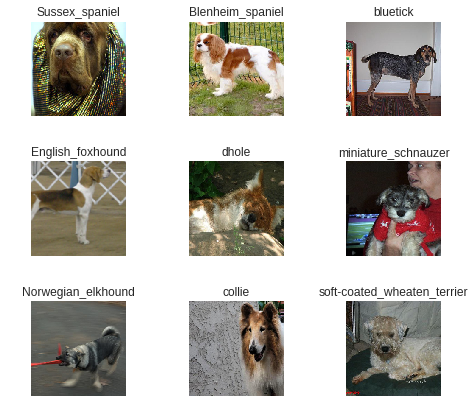

In [10]:
data.show_batch(rows=3, figsize=(7,6))

Now we have finished loading the dataset. Our next step is to train it. For this we will be creating a learner for convolutional neural network.

The create_cnn() method consist of 2 arguments. The data and the architecture we are using.We will be using resnet34 as architecture.

In [11]:
learn = create_cnn(data, models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 19311685.36it/s]


Now we fit our model using fit_one_cycle() method

In [12]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy
1,1.233411,0.615092,0.811710
2,0.772009,0.482289,0.842323
3,0.605042,0.436873,0.859329


So we have got an accuracy of approx 86%

We can save this model using the save() method and load using load() method

In [0]:
learn.save('stage-1')

In [37]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (16464 items)
[Category Norwegian_elkhound, Category Norwegian_elkhound, Category Norwegian_elkhound, Category Norwegian_elkhound, Category Norwegian_elkhound]...
Path: data/Images
x: ImageItemList (16464 items)
[Image (3, 333, 500), Image (3, 333, 500), Image (3, 333, 500), Image (3, 204, 214), Image (3, 500, 334)]...
Path: data/Images;

Valid: LabelList
y: CategoryList (4116 items)
[Category malamute, Category German_shepherd, Category redbone, Category Saint_Bernard, Category redbone]...
Path: data/Images
x: ImageItemList (4116 items)
[Image (3, 500, 463), Image (3, 375, 500), Image (3, 375, 500), Image (3, 375, 500), Image (3, 500, 375)]...
Path: data/Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2

To see what comes out of our model we can use class interpretation

In [19]:
inter = ClassificationInterpretation.from_learner(learn)

losses,idxs = inter.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

By using the method plot_top_losses we can get the images that were highly missclassified.

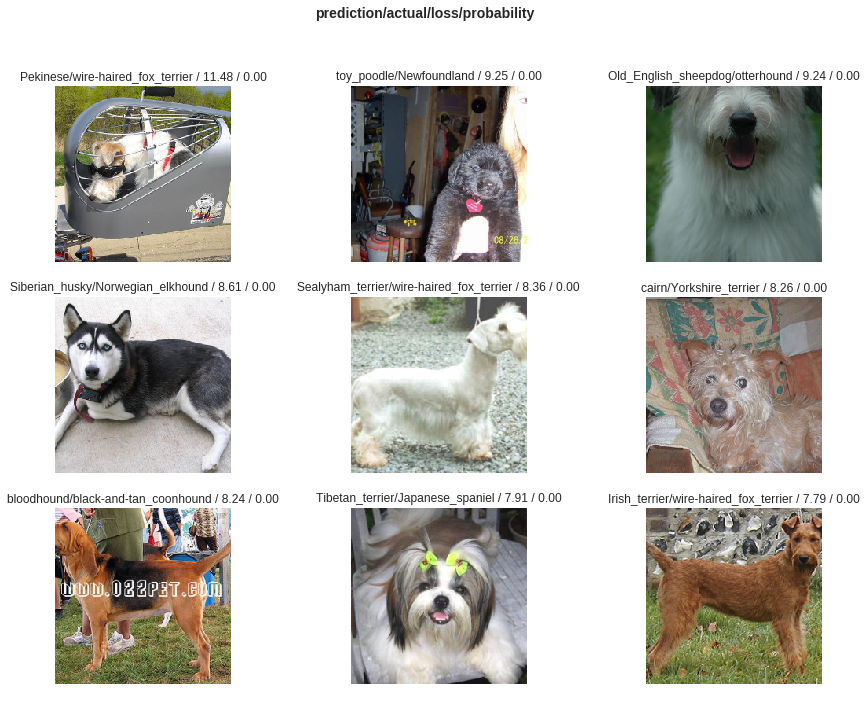

In [20]:
inter.plot_top_losses(9, figsize=(15,11))

By using the method most_confused() we can get the combination ofpredicted and actual that were wrong most often 

In [21]:
inter.most_confused(min_val=5)

[('Eskimo_dog', 'Siberian_husky', 12),
 ('Walker_hound', 'English_foxhound', 12),
 ('standard_schnauzer', 'miniature_schnauzer', 12),
 ('Siberian_husky', 'Eskimo_dog', 9),
 ('collie', 'Border_collie', 8),
 ('Cardigan', 'Pembroke', 7),
 ('Siberian_husky', 'malamute', 7),
 ('malamute', 'Siberian_husky', 7),
 ('toy_terrier', 'miniature_pinscher', 7),
 ('Irish_wolfhound', 'Scottish_deerhound', 6),
 ('Lhasa', 'Shih-Tzu', 6),
 ('toy_poodle', 'miniature_poodle', 6)]

Here we can see some of the actual prediction, what the model has predicted and number of times it have made this mistake. By seraching this dogs name in google we can see bth dogs lokks very similar and sometimes it's even harder for us humans to predict them correctly

In [30]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


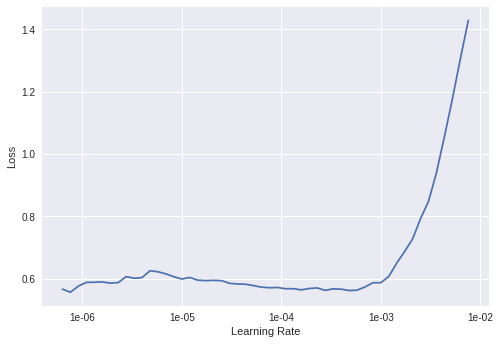

In [31]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.555659,0.427060,0.863217
2,0.518378,0.420609,0.865160


In [0]:
Now we have got a better accuracy of 86.5%